In [1]:
import os, re
import torch
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import axes3d

import seaborn as sb

from modules.models import Deep_RetiNet, DFC_LeNet_5




In [2]:
def load_reti(dataset):
    n_channels = 3 if dataset == 'SVHN' else 1
    model = Deep_RetiNet(3,7,n_channels).to('cpu')
    state_dict_path = f'trained_models/{dataset}/trained_Deep_RetiNet_d3_rks7_state_dict.pt'
    state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    return model


def load_lenet(dataset):
    n_channels = 3 if dataset == 'SVHN' else 1
    model = DFC_LeNet_5(n_channels).to('cpu')
    state_dict_path = f'trained_models/{dataset}/trained_DFC_LeNet_5_state_dict.pt'
    state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    return model

def load_aug_reti(dataset):
    n_channels = 3 if dataset == 'SVHN' else 1
    model = Deep_RetiNet(3,7,n_channels).to('cpu')
    state_dict_path = f'trained_models/{dataset}/trained_Deep_RetiNet_d3_rks7_augmented_state_dict.pt'
    state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    return model


def load_aug_lenet(dataset):
    n_channels = 3 if dataset == 'SVHN' else 1
    model = DFC_LeNet_5(n_channels).to('cpu')
    state_dict_path = f'trained_models/{dataset}/trained_DFC_LeNet_5_augmented_state_dict.pt'
    state_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    return model




In [183]:
def quick_plot_retina(aug,dataset):

    model = load_aug_reti(dataset) if aug else load_reti(dataset)  

    retina_layers = {}
    titles = ['Bipolar', 'RGC', 'LGN']

    for name, child in model.retina.named_children():
        if name == '0' or name == '3' or name == '6':
            retina_layers[name] = child.weight[0,0,:,:].detach().numpy()


    fig, axs = plt.subplots(1,3, subplot_kw={'projection' : '3d'}, figsize=(12,4))

    for ax, layer, title in zip(axs, retina_layers.values(), titles):
        integral = layer.sum()
        max = layer.max()
        min = layer.min()
        # norm_integral = integral/peak


        X = np.arange(len(layer))
        Y = X
        X, Y = np.meshgrid(X,Y)

        offset = layer.min() - (1 - layer.min())
        cmap = plt.cm.coolwarm_r

        ax.plot_surface(X, Y, layer, alpha=1, cmap=cmap, rstride=1, cstride=1, antialiased='true', norm=colors.CenteredNorm(0.0, 0.5) )
        ax.contourf(X, Y, Z=layer, zdir='z', offset=-1, cmap=cmap, alpha=0.2, norm=colors.CenteredNorm(0.0, 0.3), interpolation=False)
        ax.set_zlim(-1,0.2)

        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

        ax.grid(None)
        ax.set_xticklabels('')
        ax.set_yticklabels('')

        int_patch = mpatches.Patch(color='white', label=f'Int {integral:.1}')
        max_patch = mpatches.Patch(color='white', label=f'Max {max:.3}')
        min_patch = mpatches.Patch(color='white', label=f'Min {min:.3}')

        ax.legend(handles=[int_patch], frameon=False)

        ax.set_title(f'{title}')


In [181]:
def quick_plot_retina_SVHN(aug):

    model = load_aug_reti('SVHN') if aug else load_reti('SVHN')

    retina_layers = {}
    titles = ['Bipolar', 'RGC', 'LGN']
   


    for name, child in model.retina.named_children():
        if name == '0' or name == '3' or name == '6':
            retina_layers[name] = child.weight.detach().numpy()


    fig = plt.figure(figsize=(12,108))

    for i, (layer, title) in enumerate(zip(retina_layers.values(), titles)):

        for j, filter in enumerate(layer.reshape(-1,7,7)):
           
            ax = fig.add_subplot(27,3, 9*i+j+1, projection='3d')

            integral = filter.sum()
            max = filter.max()
            min = filter.min()

            X = np.arange(len(filter))
            Y = X
            X, Y = np.meshgrid(X,Y)

            offset = layer.min() - (1 - layer.min())
            cmap = plt.cm.coolwarm_r

            ax.plot_surface(X, Y, filter, alpha=1, cmap=cmap, rstride=1, cstride=1, antialiased='true', norm=colors.CenteredNorm(0.0, 0.5) )
            ax.contourf(X, Y, Z=filter, zdir='z', offset=-1, cmap=cmap, alpha=0.2, norm=colors.CenteredNorm(0.0, 0.3))
            ax.set_zlim(-1,0.3)
            # ax.axis('off')
            ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
            ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
            ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

            ax.grid(None)
            ax.set_xticklabels('')
            ax.set_yticklabels('')

            int_patch = mpatches.Patch(color='white', label=f'Int {integral:.1}')
            max_patch = mpatches.Patch(color='white', label=f'Max {max:.3}')
            min_patch = mpatches.Patch(color='white', label=f'Min {min:.3}')

            ax.legend(handles=[int_patch], frameon=False)
            ax.set_title(f'{title} Ch {j//3}-{j%3}')

In [189]:
def quick_plot_c0_LeNet(aug, dataset):

    if dataset == 'SVHN': raise NotImplementedError('No SVHN please')
    model = load_aug_lenet(dataset) if aug else load_lenet(dataset)

    filters = model.c1.weight.detach().numpy().squeeze()

    fig, axs = plt.subplots(1,6, subplot_kw={'projection' : '3d'}, figsize=(12,2))

    # Im calling layer the filter, change it
    for i, (ax, layer) in enumerate(zip(axs, filters)):
        integral = layer.sum()
        max = layer.max()
        min = layer.min()

        X = np.arange(len(layer))
        Y = X
        X, Y = np.meshgrid(X,Y)

        offset = layer.min() - (1 - layer.min())
        cmap = plt.cm.coolwarm_r

        ax.plot_surface(X, Y, layer, alpha=1, cmap=cmap, rstride=1, cstride=1, antialiased='true', norm=colors.CenteredNorm(0.0, 0.5) )
        ax.contourf(X, Y, Z=layer, zdir='z', offset=-1, cmap=cmap, alpha=0.2, norm=colors.CenteredNorm(0.0, 0.3), interpolation=False)
        ax.set_zlim(-1,0.5)

        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

        ax.grid(None)
        ax.set_xticklabels('')
        ax.set_yticklabels('')

        int_patch = mpatches.Patch(color='white', label=f'Int = {integral:.1}')
        max_patch = mpatches.Patch(color='white', label=f'Max {max:.3}')
        min_patch = mpatches.Patch(color='white', label=f'Min {min:.3}')

        ax.legend(handles=[int_patch], frameon=False)

        ax.set_title(f'c1-{i}')

    plt.subplot_adjust(wspace=0.1)

In [5]:
def jstripplot(data, ax, x_offset, jitter, **kwargs):
    
    for i, srs in enumerate(data):
        xes = (np.random.rand(len(srs))-0.5)*jitter + x_offset + i
        ax.scatter(xes, srs, **kwargs)

In [110]:
def reti_avg_integrals(aug, dataset, ax):
    model = load_aug_reti(dataset) if aug else load_reti(dataset)

    # Retinas
    retina_layer_names = ['Bipo','RGC','LGN']
    retina_integrals = []
    retina_mins = []
    retina_maxs = []

    for name, child in model.retina.named_children():
        if isinstance(child, torch.nn.Conv2d):
            filter = child.weight[0,0,:,:].detach().numpy()

            retina_integrals.append(filter.sum())
            retina_maxs.append(filter.max())
            retina_mins.append(filter.min())

    
    # Lenet
    lenet_layer_names = []
    lenet_integrals = []
    lenet_mins = []
    lenet_maxs = []

    for name, child in model.lenet.named_children():
        if isinstance(child, torch.nn.Conv2d):
            
            filters = child.weight.detach().numpy()
            kernel_size = child.weight[0,0,:,:].shape[0]
            filters = filters.reshape(-1, kernel_size,kernel_size)

            c_integrals = []
            c_mins = []
            c_maxs = []

            for f in filters:
                c_integrals.append(f.sum())
                c_mins.append(f.min())
                c_maxs.append(f.max())

            lenet_layer_names.append(f'{name}')
            lenet_integrals.append(c_integrals)
            lenet_maxs.append(c_maxs)
            lenet_mins.append(c_mins)


    # fig, ax = plt.subplots(1,1,figsize=(6,4))

    ax.scatter(retina_layer_names, retina_integrals, c='white', ec='tab:green', linewidth=2, s=20, marker='D')

    jstripplot(lenet_integrals, ax, 3, 0.1, alpha=0.1, c='tab:blue', s=10)

    ax.plot((-0.2,-0.2,2.2,2.2), (5,5.5,5.5,5), c="black", linewidth=1)
    ax.plot((2.7,2.7,5.3,5.3), (5,5.5,5.5,5), c="black", linewidth=1)
    ax.text(1,6,'Precortical', ha='center')
    ax.text(4,6,'Lenet', ha='center')
    ax.axhline(y=0, linestyle=':', c='black', linewidth=1)

    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels(['Bipo','RGC','LGN', 'c0', 'c3', 'c5'])

    ax.set_ylim(-8,8)
    
    ax.set_title(f'RetiLeNet: {dataset}')
    ax.set_xlabel('Convolutional layer')
    ax.set_ylabel('Filter integral')

In [97]:
def reti_avg_integrals_SVHN(aug,ax):
    model = load_aug_reti('SVHN') if aug else load_reti('SVHN')

    # Retinas
    retina_integrals = []
    retina_mins = []
    retina_maxs = []

    for name, child in model.retina.named_children():
        if isinstance(child, torch.nn.Conv2d):
            
            filters = child.weight.detach().numpy()
            kernel_size = child.weight[0,0,:,:].shape[0]
            filters = filters.reshape(-1, kernel_size,kernel_size)

            c_integrals = []
            c_mins = []
            c_maxs = []

            for f in filters:
                c_integrals.append(f.sum())
                c_mins.append(f.min())
                c_maxs.append(f.max())

            retina_integrals.append(c_integrals)
            retina_maxs.append(c_maxs)
            retina_mins.append(c_mins)

    
    # Lenet
    lenet_layer_names = []
    lenet_integrals = []
    lenet_mins = []
    lenet_maxs = []

    for name, child in model.lenet.named_children():
        if isinstance(child, torch.nn.Conv2d):
            
            filters = child.weight.detach().numpy()
            kernel_size = child.weight[0,0,:,:].shape[0]
            filters = filters.reshape(-1, kernel_size,kernel_size)

            c_integrals = []
            c_mins = []
            c_maxs = []

            for f in filters:
                c_integrals.append(f.sum())
                c_mins.append(f.min())
                c_maxs.append(f.max())

            lenet_layer_names.append(f'{name}')
            lenet_integrals.append(c_integrals)
            lenet_maxs.append(c_maxs)
            lenet_mins.append(c_mins)

    jstripplot(retina_integrals, ax, 0, 0.1, alpha=0.7, c='tab:green', s=15)
    # ax.scatter(retina_layer_names, retina_integrals, c='royalblue')
    # sb.stripplot(retina_integrals, alpha=0.5, jitter=0.1, ax=ax)
    # plt.plot(retina_layer_names, retina_mins)
    # plt.plot(retina_layer_names, retina_maxs)
    ax.set_xticklabels(['','Bipo','RGC','LGN'])

    jstripplot(lenet_integrals, ax, 3, 0.1, alpha=0.5, c='tab:blue', s=15)
    # sb.stripplot(lenet_integrals, palette='gray', alpha=0.2, jitter=0.1, ax=ax)
    # sb.stripplot(lenet_maxs, color='royalblue', alpha=0.1)
    # sb.stripplot(lenet_mins, color='red', alpha=0.1)
    # sb.stripplot(lenet_mins)

    ax.plot((-0.2,-0.2,2.2,2.2), (5,5.5,5.5,5), c="black", linewidth=1)
    ax.plot((2.7,2.7,5.3,5.3), (5,5.5,5.5,5), c="black", linewidth=1)
    ax.text(1,6,'Precortical', ha='center')
    ax.text(4,6,'Lenet', ha='center')
    ax.axhline(y=0, linestyle=':', c='black', linewidth=1)

    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels(['Bipo','RGC','LGN', 'c0', 'c3', 'c5'])

    ax.set_ylim(-8,8)
    
    ax.set_title('RetiLeNet: SVHN')
    ax.set_xlabel('Convolutional layer')
    ax.set_ylabel('Filter integral')

In [98]:
def lenet_avg_integrals(aug, dataset, ax):
    model = load_aug_lenet(dataset) if aug else load_lenet(dataset)

    # Lenet
    lenet_layer_names = []
    lenet_integrals = []
    lenet_mins = []
    lenet_maxs = []

    for name, child in model.named_children():
        if isinstance(child, torch.nn.Conv2d):
            
            filters = child.weight.detach().numpy()
            kernel_size = child.weight[0,0,:,:].shape[0]
            filters = filters.reshape(-1, kernel_size,kernel_size)

            c_integrals = []
            c_mins = []
            c_maxs = []

            for f in filters:
                c_integrals.append(f.sum())
                c_mins.append(f.min())
                c_maxs.append(f.max())

            lenet_layer_names.append(f'{name}')
            lenet_integrals.append(c_integrals)
            lenet_maxs.append(c_maxs)
            lenet_mins.append(c_mins)

    jstripplot(lenet_integrals, ax, 0, 0.2, alpha=0.2, c='tab:blue', s=15)

    ax.axhline(y=0, linestyle=':', c='black', linewidth=1)

    ax.set_xticks([0,1,2])
    ax.set_xticklabels(['c0', 'c3', 'c5'])

    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(-8,8)
    
    ax.set_title(f'LeNet_5: {dataset}')
    ax.set_xlabel('Convolutional layer')
    ax.set_ylabel('Filter integral')

/tmp/ipykernel_32633/3007620399.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Bipo','RGC','LGN'])


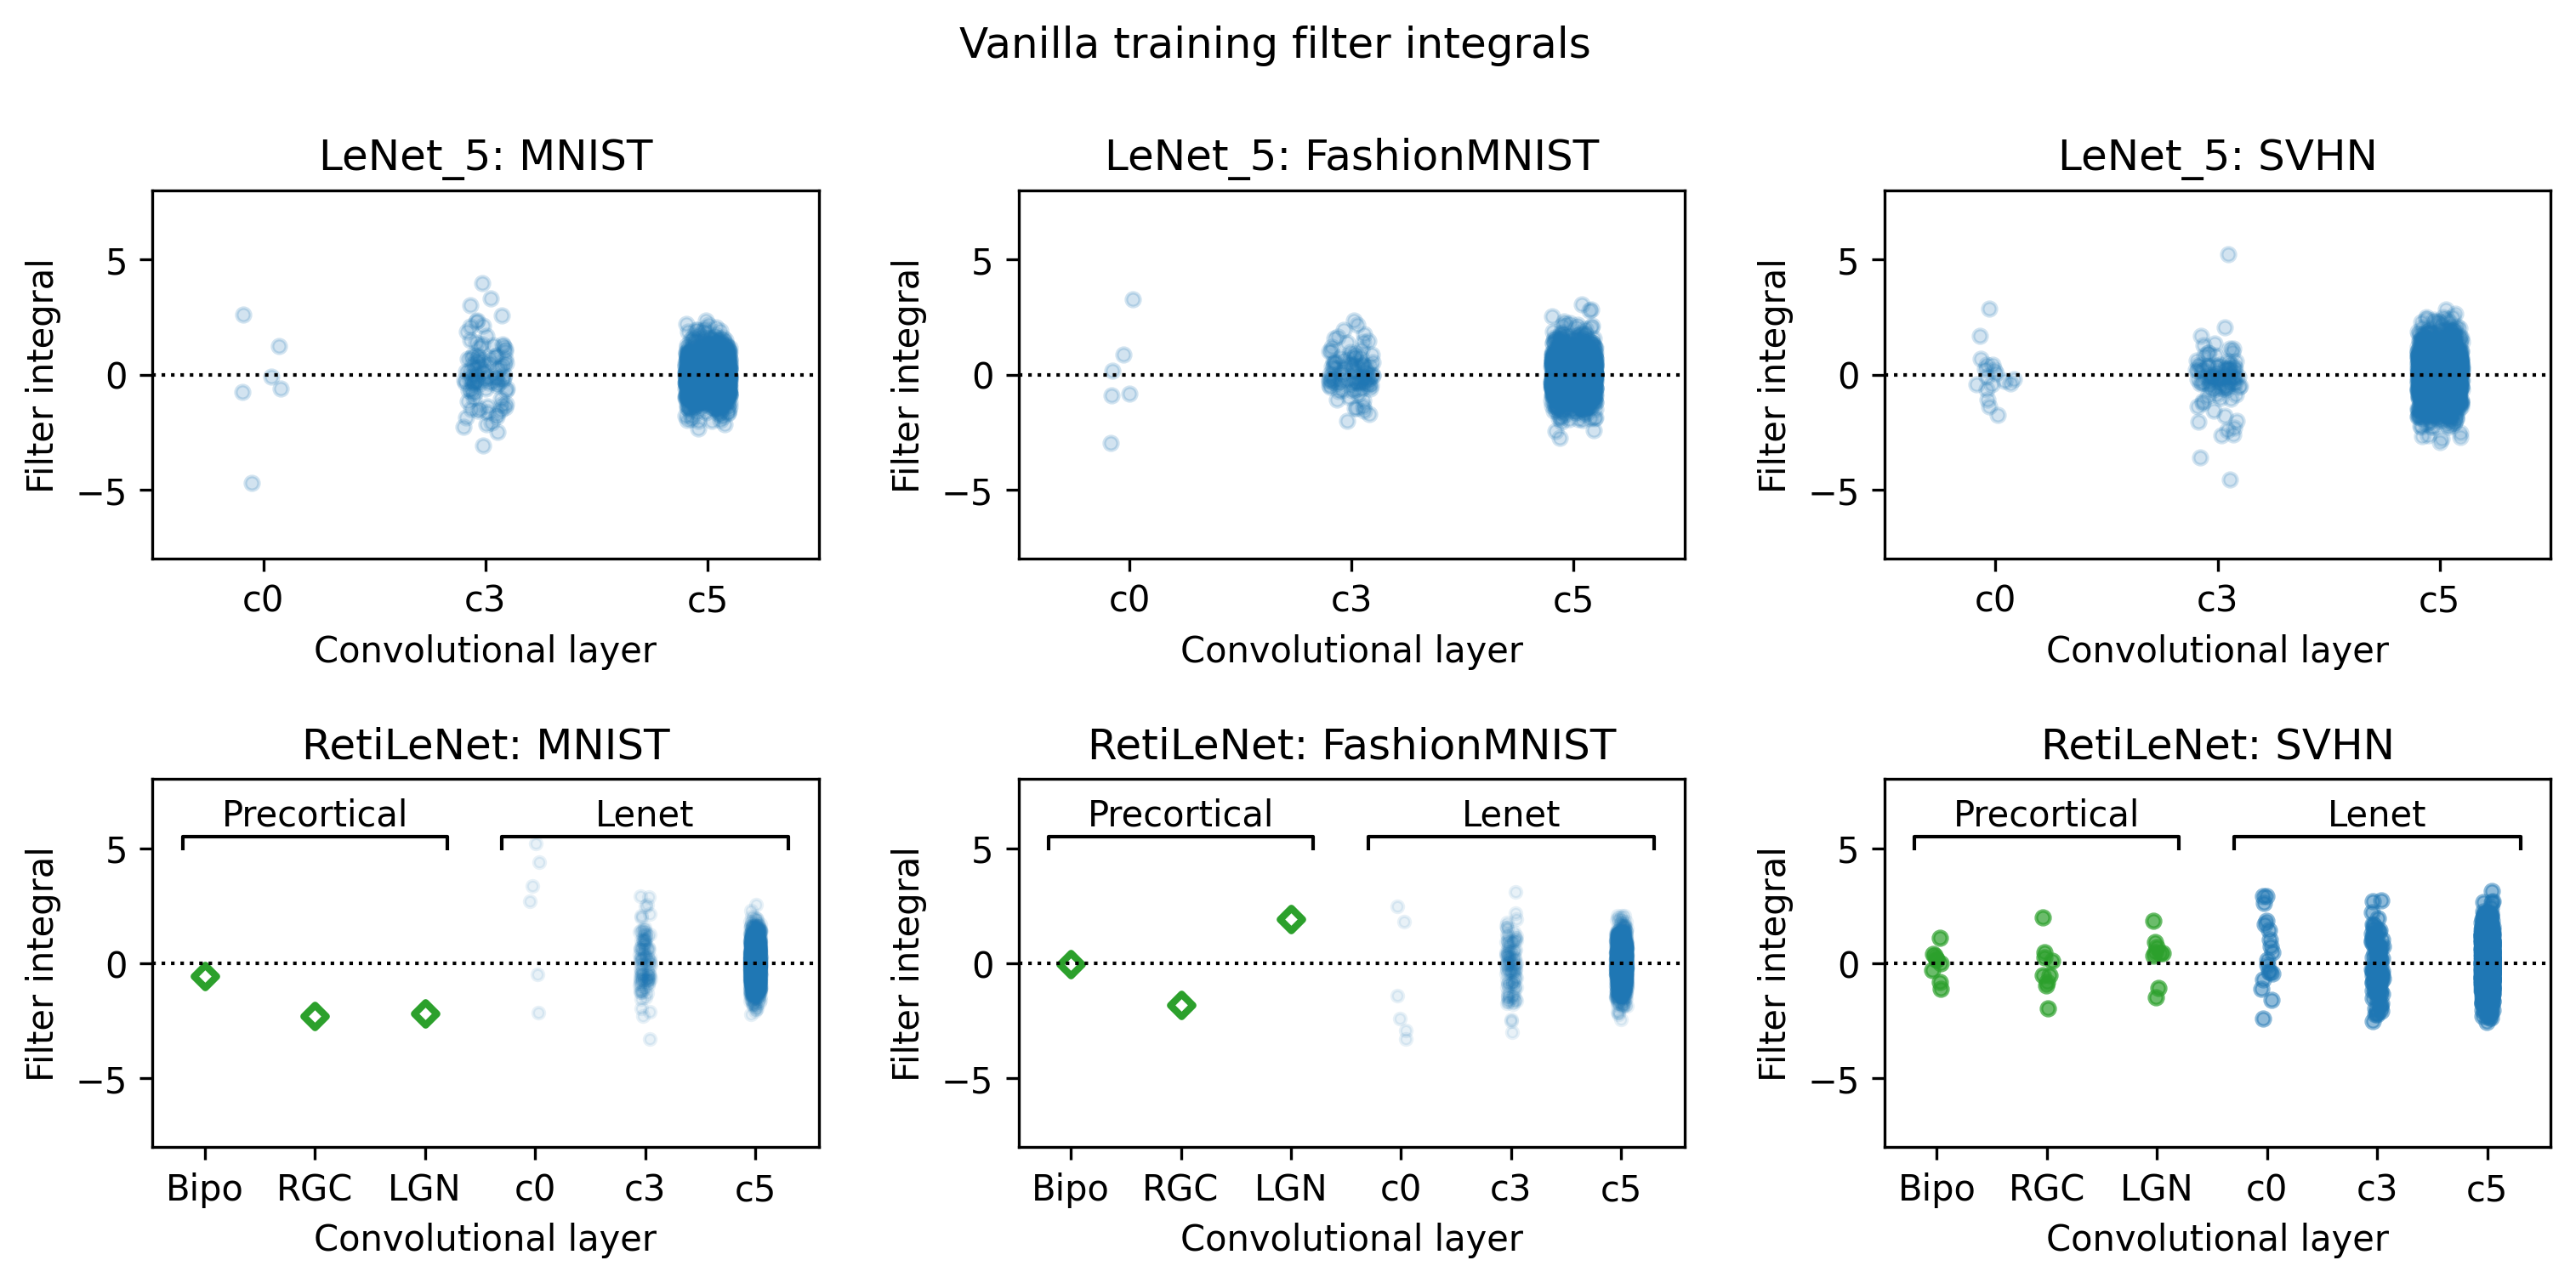

In [117]:
fig, axs = plt.subplots(2,3,figsize=(10,5), dpi=300)

lenet_avg_integrals(False, 'MNIST', axs[0,0])
lenet_avg_integrals(False, 'FashionMNIST', axs[0,1])
lenet_avg_integrals(False, 'SVHN', axs[0,2])

reti_avg_integrals(False, 'MNIST', axs[1,0])
reti_avg_integrals(False, 'FashionMNIST', axs[1,1])
reti_avg_integrals_SVHN(False, axs[1,2])

fig.suptitle('Vanilla training filter integrals')

plt.subplots_adjust(left=0.06, bottom=0.1, right=1, top=0.85, wspace=0.3, hspace=0.6)

plt.savefig('plots/filter_integrals/vanilla_training.png')


/tmp/ipykernel_32633/3007620399.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Bipo','RGC','LGN'])


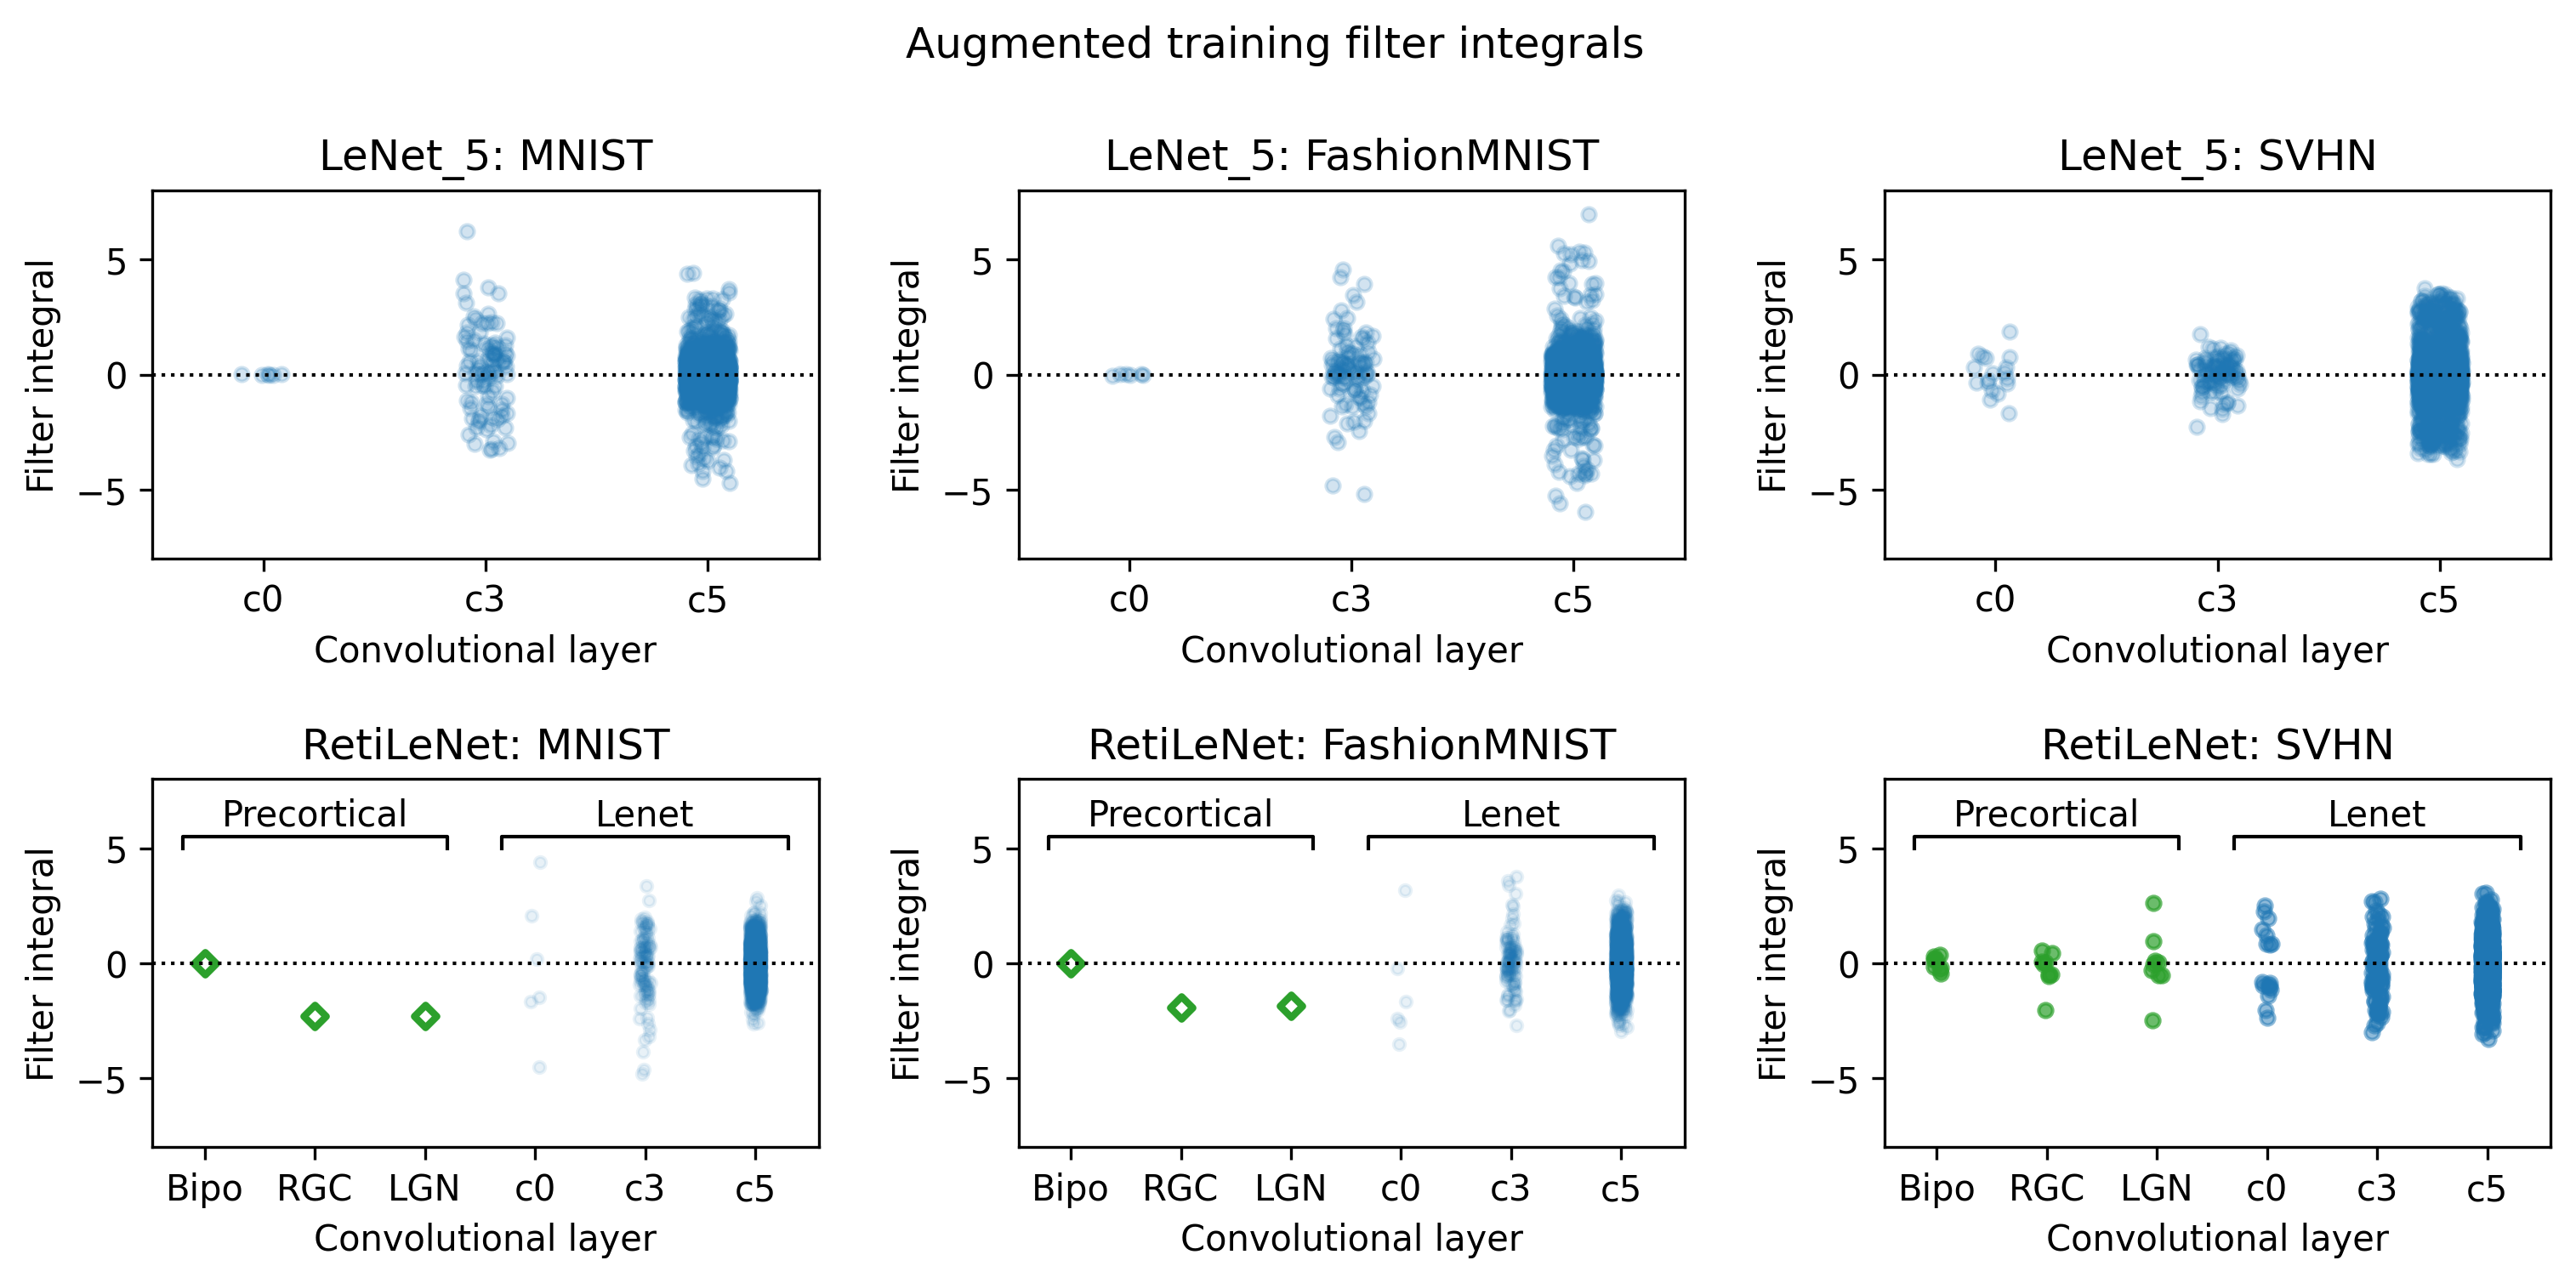

In [116]:
fig, axs = plt.subplots(2,3,figsize=(10,5), dpi=300)

lenet_avg_integrals(True, 'MNIST', axs[0,0])
lenet_avg_integrals(True, 'FashionMNIST', axs[0,1])
lenet_avg_integrals(True, 'SVHN', axs[0,2])

reti_avg_integrals(True, 'MNIST', axs[1,0])
reti_avg_integrals(True, 'FashionMNIST', axs[1,1])
reti_avg_integrals_SVHN(True, axs[1,2])

fig.suptitle('Augmented training filter integrals')

plt.subplots_adjust(left=0.06, bottom=0.1, right=1, top=0.85, wspace=0.3, hspace=0.6)

plt.savefig('plots/filter_integrals/augmented_training.png')


In [177]:
a = 0.04234324
print(f'{a:2.2}')

0.042


/tmp/ipykernel_32633/190402635.py:30: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax.contourf(X, Y, Z=layer, zdir='z', offset=-1, cmap=cmap, alpha=0.2, norm=colors.CenteredNorm(0.0, 0.3), interpolation=False)
/tmp/ipykernel_32633/2156516175.py:24: UserWarning: The following kwargs were not used by contour: 'interpolation'
  ax.contourf(X, Y, Z=layer, zdir='z', offset=-1, cmap=cmap, alpha=0.2, norm=colors.CenteredNorm(0.0, 0.3), interpolation=False)


AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot_adjust'

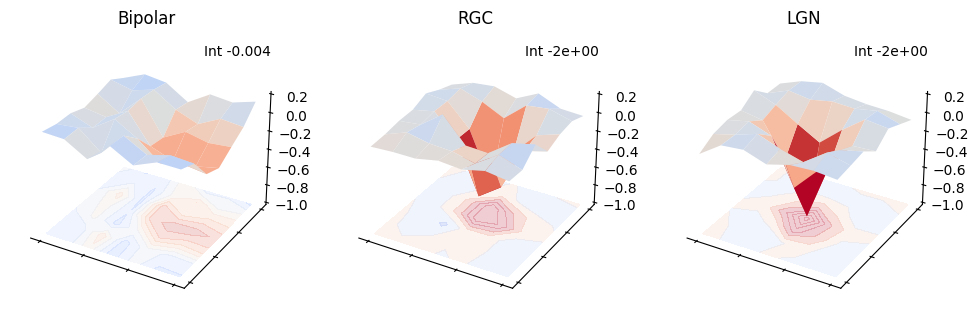

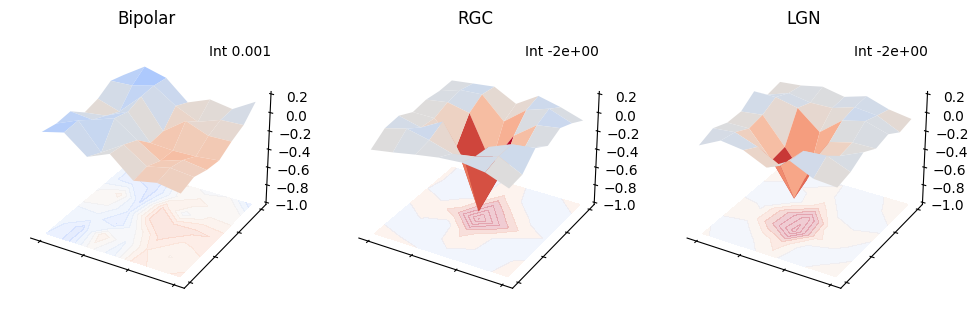

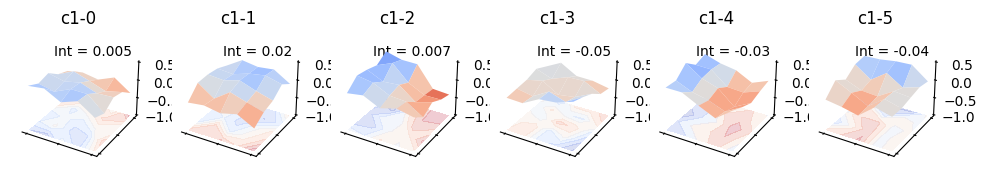

In [190]:
quick_plot_retina(True,'MNIST')
quick_plot_retina(True,'FashionMNIST')
quick_plot_c0_LeNet(True, 'FashionMNIST')
# quick_plot_retina_SVHN()
